In [8]:
import pygad
import numpy

S = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
     [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
     [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
     [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
     [1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
     [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1],
     [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
     [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
     [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
     [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
     [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


In [9]:
gene_space = [0, 1, 2, 3]  # 0 - prawo, 1 - lewo, 2 - dol, 3 - gora

In [10]:
def fitness_func(solution, solution_idx):
    start = [1, 1]
    koniec = [10, 10]
    ruchy = 0
    odwiedzone = []

    for i in solution:
        if start in odwiedzone:
            ruchy += 1
        else:
            odwiedzone.append(start)

        if start == koniec:
            return 30-ruchy
        else:
            match i:
                case 0:
                    id = [start[0], start[1]+1]
                    if S[id[0]][id[1]] == 0:
                        start = id
                    ruchy += 1
                case 1:
                    id = [start[0], start[1]-1]
                    if S[id[0]][id[1]] == 0:
                        start = id
                    ruchy += 1
                case 2:
                    id = [start[0]+1, start[1]]
                    if S[id[0]][id[1]] == 0:
                        start = id
                    ruchy += 1
                case 3:
                    id = [start[0]-1, start[1]]
                    if S[id[0]][id[1]] == 0:
                        start = id
                    ruchy += 1

    return -(abs(start[0]-koniec[0])+abs(start[1]-koniec[1])+ruchy)

fitness_function = fitness_func

In [11]:
def mapowanie(s):
    aktualne_pole = [1, 1]
    sciezka = []
    for i in s:
        sciezka.append(aktualne_pole)
        if aktualne_pole == [10, 10]:
            return [sciezka, len(sciezka)-1]
        elif i == 0 and S[aktualne_pole[0]][aktualne_pole[1]+1] == 0:
            aktualne_pole = [aktualne_pole[0], aktualne_pole[1]+1]
        elif i == 1 and S[aktualne_pole[0]][aktualne_pole[1]-1] == 0:
            aktualne_pole = [aktualne_pole[0], aktualne_pole[1]-1]
        elif i == 2 and S[aktualne_pole[0]+1][aktualne_pole[1]] == 0:
            aktualne_pole = [aktualne_pole[0]+1, aktualne_pole[1]]
        elif i == 3 and S[aktualne_pole[0]-1][aktualne_pole[1]] == 0:
            aktualne_pole = [aktualne_pole[0]-1, aktualne_pole[1]]
    return [sciezka, len(sciezka)-1]


In [15]:
# ile chromsomów w populacji
# ile genow ma chromosom
sol_per_pop = 500
num_genes = 30

# ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
# ile pokolen
# ilu rodzicow zachowac (kilka procent)
num_parents_mating = 250
num_generations = 1000
keep_parents = 2

parent_selection_type = "sss"
crossover_type = "single_point"

# mutacja ma dzialac na ilu procent genow?
# trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 4


In [13]:
# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

Najlepsze parametry wybrane przez algorytm: [0. 0. 2. 2. 3. 0. 0. 3. 0. 0. 2. 2. 2. 2. 2. 0. 0. 2. 0. 2. 2. 2. 1. 2.
 1. 2. 0. 1. 2. 2.]
Najlepsza wartość fitness wybrana przez algorytm: 7
[[1, 1], [1, 2], [1, 3], [2, 3], [3, 3], [2, 3], [2, 4], [2, 5], [1, 5], [1, 6], [1, 7], [2, 7], [3, 7], [4, 7], [5, 7], [6, 7], [6, 8], [6, 9], [7, 9], [7, 10], [8, 10], [9, 10], [10, 10]]
Liczba kroków: 22


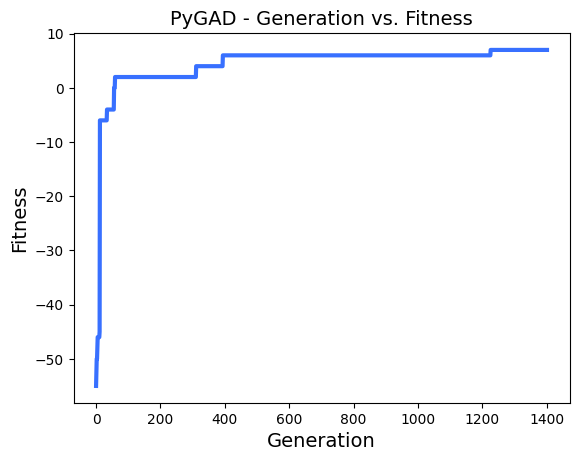

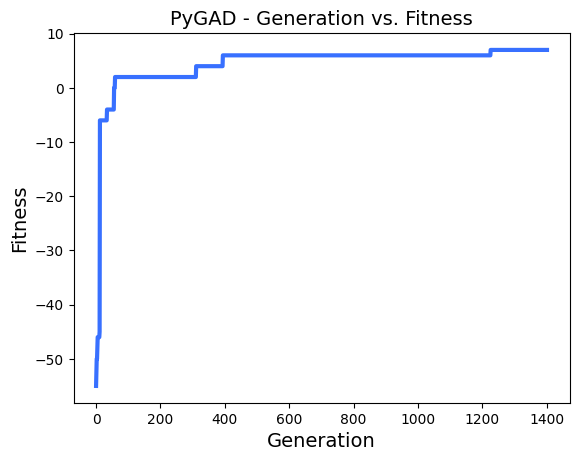

In [16]:
# uruchomienie algorytmu
ga_instance.run()

# podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Najlepsze parametry wybrane przez algorytm: {solution}".format(
    solution=solution))
print("Najlepsza wartość fitness wybrana przez algorytm: {solution_fitness}".format(
    solution_fitness=solution_fitness))

kroki = mapowanie(solution)
print(kroki[0])
print("Liczba kroków: " + str(kroki[1]))

# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()
